b0=0.00010083186816217107
b1=0.030216123525763958
b2=-0.004944616403078561
accuracy=60.0


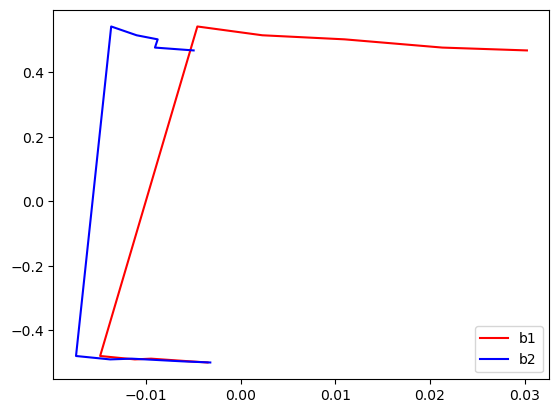

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data=pd.read_csv('data.csv')
x1=data.iloc[:,0]
x2=data.iloc[:,1]
y=data.iloc[:,2]
b0=0
b1=0
b2=0
alpha=0.01
beta1=[]
beta2=[]
error=[]
pred=[]
for i in range(data.shape[0]):
    z=b0+(b1*x1[i])+(b2*x2[i])
    p=1/(1+np.exp(-z))
    pred.append(p)
    e=y[i]-p
    error.append(e)
    b0=b0+(alpha*(e)*(1-p)*p)
    b1=b1+(alpha*(e)*(1-p)*p*x1[i])
    b2=b2+(alpha*(e)*(1-p)*p*x2[i])
    beta1.append(b1)
    beta2.append(b2)
print(f"b0={b0}")
print(f"b1={b1}")
print(f"b2={b2}")
count=0
accuracy=0
for i in range(len(pred)):
    if(pred[i])>=0.5:
        pred[i]=1
    else:
        pred[i]=0
    if(pred[i]-y[i]==0):
        count=count+1
accuracy=(count/data.shape[0])*100
print(f"accuracy={accuracy}")
plt.plot(beta1,error,color='r',label='b1')
plt.plot(beta2,error,color='b',label='b2')
plt.legend()
plt.show()

In [23]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
x=data.iloc[:,0:2]
y=data.iloc[:,2]
scaler=StandardScaler()
scaler.fit_transform(x)
model=LogisticRegression(solver='liblinear')
model.fit(x,y)
count=0
y_pred=model.predict(x)
for i in range(len(pred)):
    if(y_pred[i]-y[i]==0):
        count=count+1
accuracy=(count/data.shape[0])*100
print(f"accuracy={accuracy}")

accuracy=100.0


C:\Users\Bhavya\AppData\Local\Temp\ipykernel_32920\609230549.py:4: RuntimeWarning: divide by zero encountered in log
  z=-np.log(x)


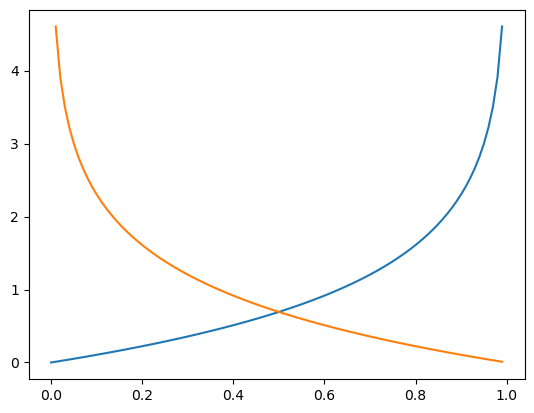

In [25]:
import numpy as np
x=np.arange(0,1,0.01)
y=-np.log(1-x)
z=-np.log(x)
plt.plot(x,y)
plt.plot(x,z)
plt.show()